# Prediction of heart disease using Machine Learning model.

#### We have collected data from kaggle website (https://www.kaggle.com/ronitf/heart-disease-uci//). in this project we are going to predict that whether a person is suffring from heart disease or not.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [67]:
# let's look at the dataset.

data = pd.read_csv('heart.csv')

In [68]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Feature selection

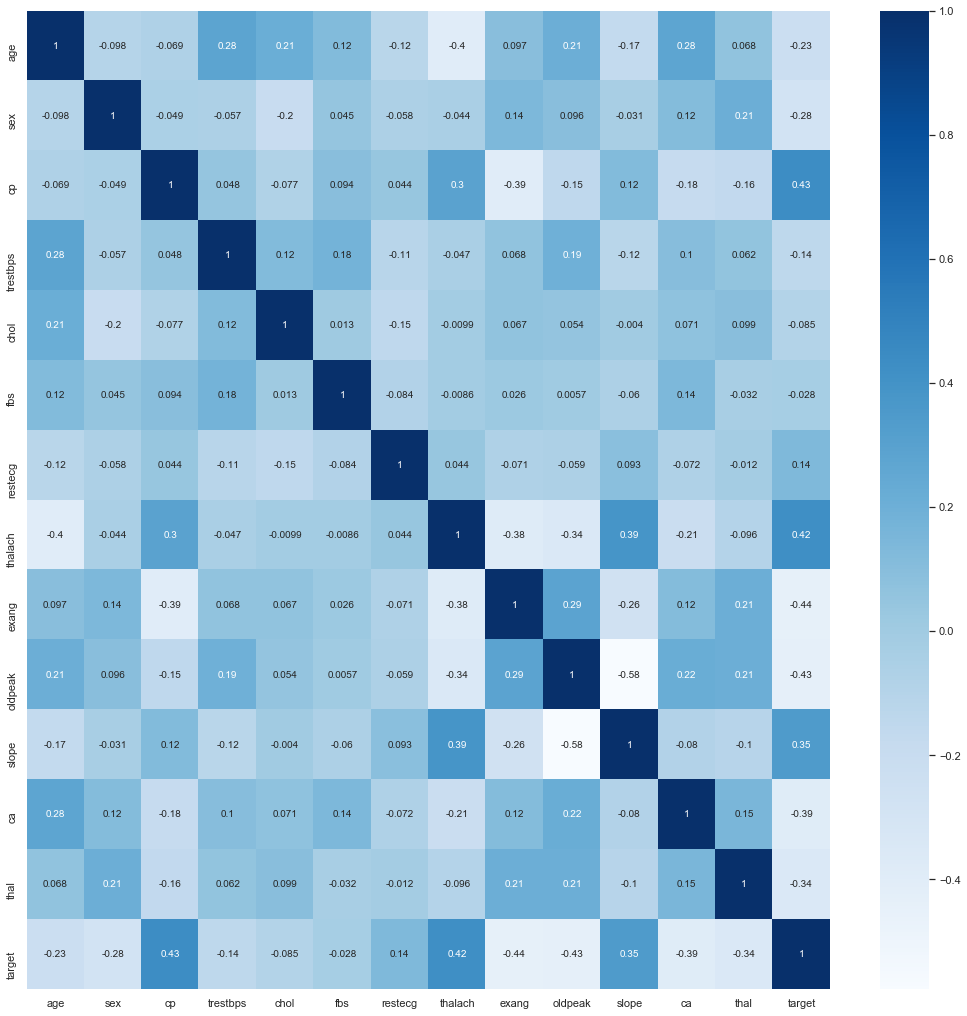

In [71]:
# let us check if there is any correlation among the parameters.

correlation = data.corr()
top_corr_features = correlation.index
plt.figure(figsize = (18,18))

import seaborn as sns
hm = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = 'Blues')

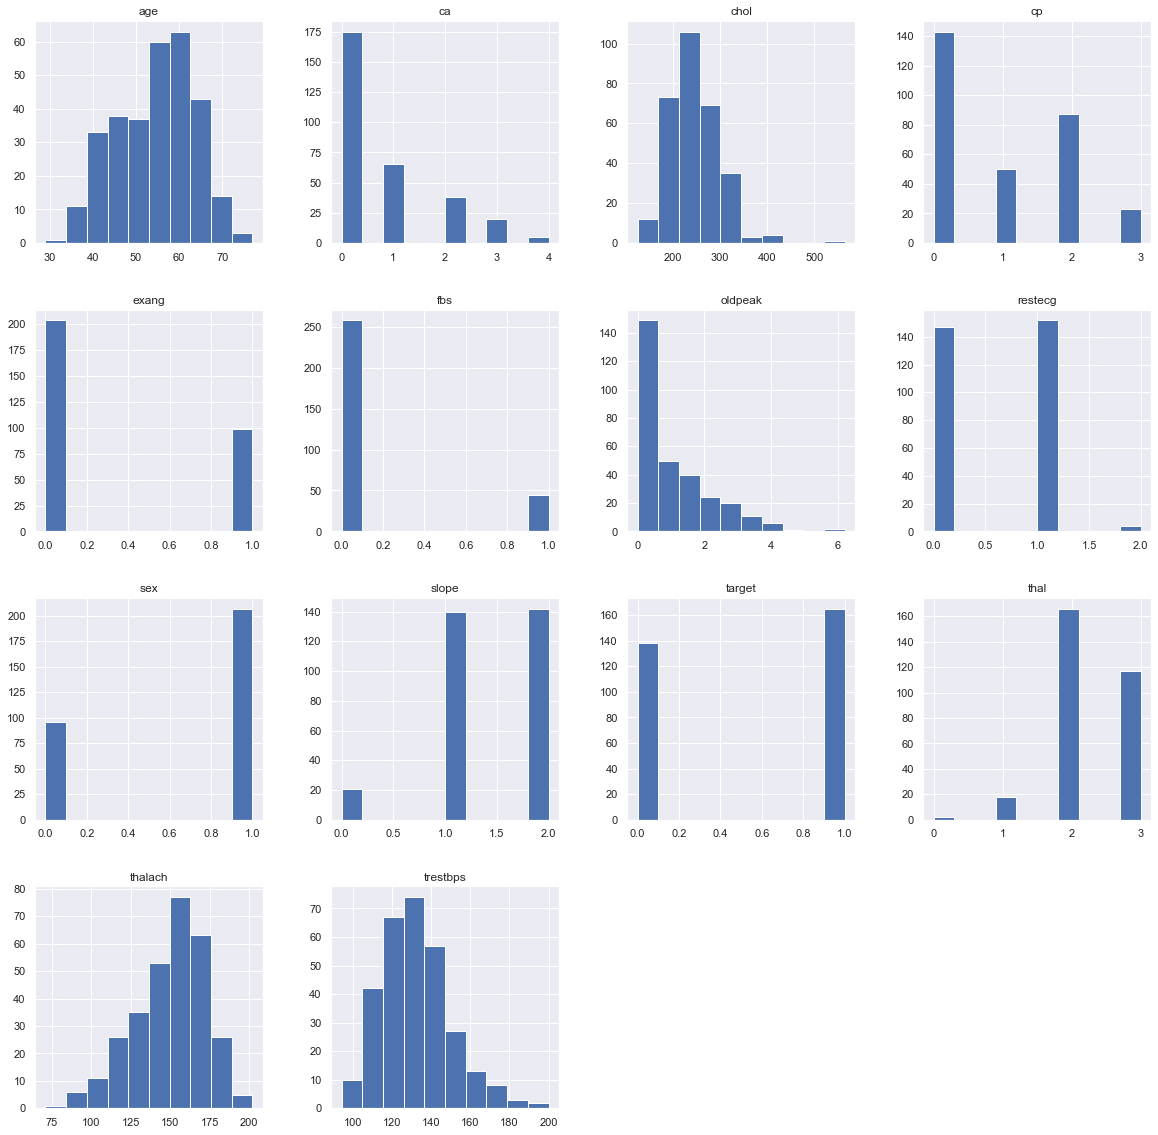

In [72]:
data.hist(figsize = (20,20))
plt.show()

#### We should always work with the datasets where the target classes (dependent variable) are of approximately same size, let's check for that.

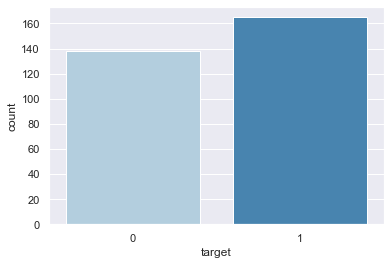

In [73]:
sns.set_style('darkgrid')
sns.countplot(x='target', data = data, palette='Blues')
sns.set(rc={'figure.figsize':(10,12)})

In [74]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data preprocessing.

#### After exploring data I have seen that this dataset is having some categorical variables, and I need to convert them into dummy variables before traing the model. I will using 'get_dummies' method to do so.

In [75]:
df = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df.head(21)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,44,120,263,173,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
8,52,172,199,162,0.5,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
9,57,150,168,174,1.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


# Feature scaling
#### As we look at the dataset we see that there is a big diffence btw the dummy variables and other variables, therefore we need to perform feature scaling. let's do it.

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols_to_scale = ['age','trestbps','chol','oldpeak','thalach']
df[cols_to_scale] = sc.fit_transform(df[cols_to_scale])

In [77]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [78]:
X = df.drop(['target'],axis = 1)
Y = df['target']

In [79]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [80]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Splitting dataset into train and test dataset.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.34, random_state = 0)

In [82]:
print(X_train,Y_train,X_test,Y_test)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
205 -0.260980 -0.206964  0.168827  0.496478 -0.896862      0      1     1   
254  0.511041  1.620649  0.516686 -1.077820 -0.896862      0      1     0   
182  0.731619 -0.092738  1.618238  0.846322 -0.896862      1      0     1   
56  -0.702136 -0.549641 -0.468914  1.589741 -0.896862      0      1     1   
71  -0.371269 -2.148802 -0.372287  0.190365 -0.896862      0      1     0   
..        ...       ...       ...       ...       ...    ...    ...   ...   
251 -1.253580  0.021488  0.014223 -0.290671 -0.810592      0      1     1   
192 -0.040403 -0.663867 -1.125980 -1.602586  0.310912      0      1     1   
117  0.180175 -0.663867 -1.029353  0.540209  0.742260      0      1     0   
47  -0.812425  0.364165  0.207478  0.277826 -0.896862      0      1     0   
172  0.400752 -0.663867  0.729266  0.452748  0.655990      0      1     0   

     cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1

# Now let us apply the Machine learning Algorithms for the prediction.

### This is a classification problem so we will be using classification methods such as KNN and Random Forest Classifier.

#### K Nearest Neighbors (KNN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [84]:
Y_predict = classifier.predict(X_test)

In [85]:
# Making the Confusion Matrix to check how the model has performed. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
print(cm)

[[35 15]
 [ 7 47]]


In [101]:
accknn = accuracy_score(Y_test, Y_predict)
accknn

0.7884615384615384

In [87]:
clf_rep = classification_report(Y_test, Y_predict)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        50
           1       0.76      0.87      0.81        54

    accuracy                           0.79       104
   macro avg       0.80      0.79      0.79       104
weighted avg       0.79      0.79      0.79       104



#### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
randomforestclassifier = RandomForestClassifier(n_estimators=100)
randomforestclassifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
Y_pred = randomforestclassifier.predict(X_test)

In [90]:
# Making the Confusion Matrix to check how the model has performed.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[38 12]
 [ 7 47]]


In [102]:
accrfc = accuracy_score(Y_test, Y_pred)
accrfc

0.8173076923076923

In [92]:
clf_rep = classification_report(Y_test, Y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        50
           1       0.80      0.87      0.83        54

    accuracy                           0.82       104
   macro avg       0.82      0.82      0.82       104
weighted avg       0.82      0.82      0.82       104



#### Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [97]:
Y_predictions = dtc.predict(X_test)

In [98]:
# Making the Confusion Matrix to check how the model has performed.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predictions)
print(cm)

[[37 13]
 [13 41]]


In [103]:
accdtc = accuracy_score(Y_test, Y_predictions)
accdtc

0.75

In [100]:
clf_rep = classification_report(Y_test, Y_predictions)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        50
           1       0.76      0.76      0.76        54

    accuracy                           0.75       104
   macro avg       0.75      0.75      0.75       104
weighted avg       0.75      0.75      0.75       104



In [104]:
print(accrfc)
print(accdtc)
print(accknn)

0.8173076923076923
0.75
0.7884615384615384


In [105]:
# Among KNN, Random Forest Classifier and Decision Tree Classifier, the dtc has given the highest accuracy of predictions.